<a href="https://colab.research.google.com/github/2303A52014/2303A52014/blob/main/2303a52014(Q11)BATCH_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter
data = pd.read_csv('/content/data.csv')
print(data.head())
print(data.info())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

1.identify the top 5 reasons for obestity level


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter


data = pd.read_csv('/content/data.csv')


df = data.copy()


encoder = LabelEncoder()


for column in df.columns:

    if df[column].dtype == 'object':

        df[column] = encoder.fit_transform(df[column])


X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 5 Reasons for Obesity Levels:\n", feature_importance.head(5))

Top 5 Reasons for Obesity Levels:
 Weight    0.346339
Height    0.104206
Age       0.100399
FCVC      0.083822
Gender    0.060209
dtype: float64


2.identify the age group with mostly obestity

In [ ]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['Child', 'Youth', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_obesity = df.groupby('AgeGroup')['NObeyesdad'].value_counts().unstack()
print("Obesity by Age Group:\n", age_obesity)

Obesity by Age Group:
 NObeyesdad     0    1    2    3    4    5    6
AgeGroup                                      
Child         80   68   39    0    1   31   22
Youth        189  201  226  187  323  216  172
Adult          3   16   84  110    0   42   87
Middle-aged    0    1    2    0    0    1    9
Senior         0    1    0    0    0    0    0


<ipython-input-9-d5ab72c4204c>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



3.find the max and minnweight of patient with obesity

In [ ]:
max_weight = data['Weight'].max()
min_weight = data['Weight'].min()
print(f"Maximum weight: {max_weight}, Minimum weight: {min_weight}")

Maximum weight: 173.0, Minimum weight: 39.0


4.name the top 5 eating habits contributing to obestity

In [ ]:
# Eating habit columns
eating_habits = ['FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC']

# Correlation with obesity levels
correlation = df[eating_habits + ['NObeyesdad']].corr()
print("Correlation with Obesity Levels:\n", correlation['NObeyesdad'].sort_values(ascending=False))


Correlation with Obesity Levels:
 NObeyesdad    1.000000
CAEC          0.327295
CH2O          0.108868
FCVC          0.018522
NCP          -0.092616
CALC         -0.134632
Name: NObeyesdad, dtype: float64


5.identify the highest usage of tech gadgets among the obese patients

In [ ]:
tech_usage_by_obesity = data.groupby('NObeyesdad')['TUE'].mean()
print("Tech gadget usage by obesity level:")
print(tech_usage_by_obesity)

Tech gadget usage by obesity level:
NObeyesdad
Insufficient_Weight    0.839459
Normal_Weight          0.675958
Obesity_Type_I         0.676743
Obesity_Type_II        0.515186
Obesity_Type_III       0.604623
Overweight_Level_I     0.612992
Overweight_Level_II    0.697275
Name: TUE, dtype: float64


6.apply either classification model or clustering model to evaluate the dataset

In [ ]:
label_encoder = LabelEncoder()
data['NObeyesdad_encoded'] = label_encoder.fit_transform(data['NObeyesdad'])

X = data.drop(columns=['NObeyesdad', 'NObeyesdad_encoded'])
y = data['NObeyesdad_encoded']

X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score and classification_report

# ... your existing code ...

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) # Now accuracy_score is defined and accessible
print("Classification Model - Random Forest:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Model - Random Forest:
Accuracy: 0.92
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.94      0.93        86
      Normal_Weight       0.76      0.85      0.80        93
     Obesity_Type_I       0.99      0.95      0.97       102
    Obesity_Type_II       0.99      0.99      0.99        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.90      0.82      0.86        88
Overweight_Level_II       0.92      0.91      0.92        79

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.93      0.92      0.92       634




Clustering Model - KMeans:
         NObeyesdad
Cluster            
0               277
1               861
2                 7
3               242
4               724


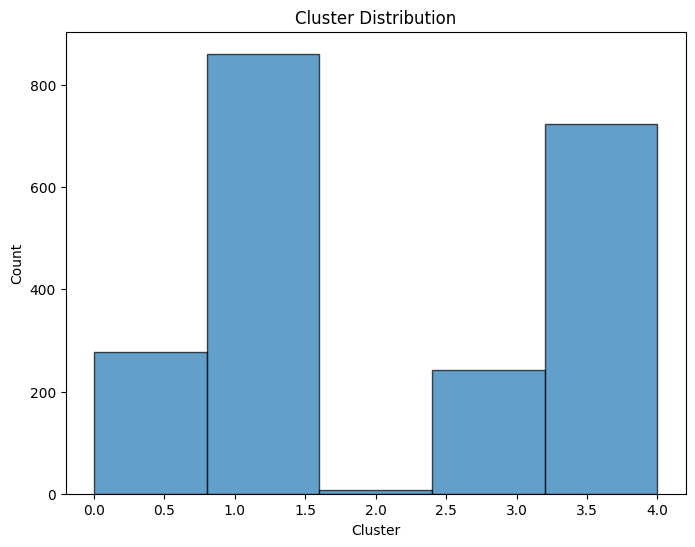

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nClustering Model - KMeans:")
print(data[['NObeyesdad', 'Cluster']].groupby('Cluster').count())

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(data['Cluster'], bins=5, edgecolor='k', alpha=0.7)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()